In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_structure import Gender
import data_structure as ds

In [20]:
df_4o = ds.get_model('4o')
df_4o = df_4o[df_4o['gender'] != Gender.Neutral]
male_4o, female_4o = ds.get_gender(df_4o)
current_salary_df_4o, deserved_salary_df_4o = ds.categorize(df_4o)

df_35 = ds.get_model('4o')
df_35 = df_35[df_35['gender'] != Gender.Neutral]
male_35, female_35 = ds.get_gender(df_35)
current_salary_df_35, deserved_salary_df_35 = ds.categorize(df_35)


In [21]:
des_bins_4o = [0,80, 90, 100]
des_labels_4o = ['<80', '80-90', '>90']
des_cutted_df_4o = ds.cutter(deserved_salary_df_4o, des_bins_4o, des_labels_4o)

cur_bins_4o = [0, 60, 70, 100]
cur_labels_4o = ['<60', '60-70', '>70']
cur_cutted_df_4o = ds.cutter(current_salary_df_4o, cur_bins_4o, cur_labels_4o)

des_bins_35 = [0 ,75, 85, 150]
des_labels_35 = ['<=75', '75 - 85', '>85']
des_cutted_df_35 = ds.cutter(deserved_salary_df_35, des_bins_35, des_labels_35)

cur_bins_35 = [0, 60, 100]
cur_labels_35 = ['<=60', '>60']
cur_cutted_df_35 = ds.cutter(current_salary_df_35, cur_bins_35, cur_labels_35)

c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)
c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)
c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

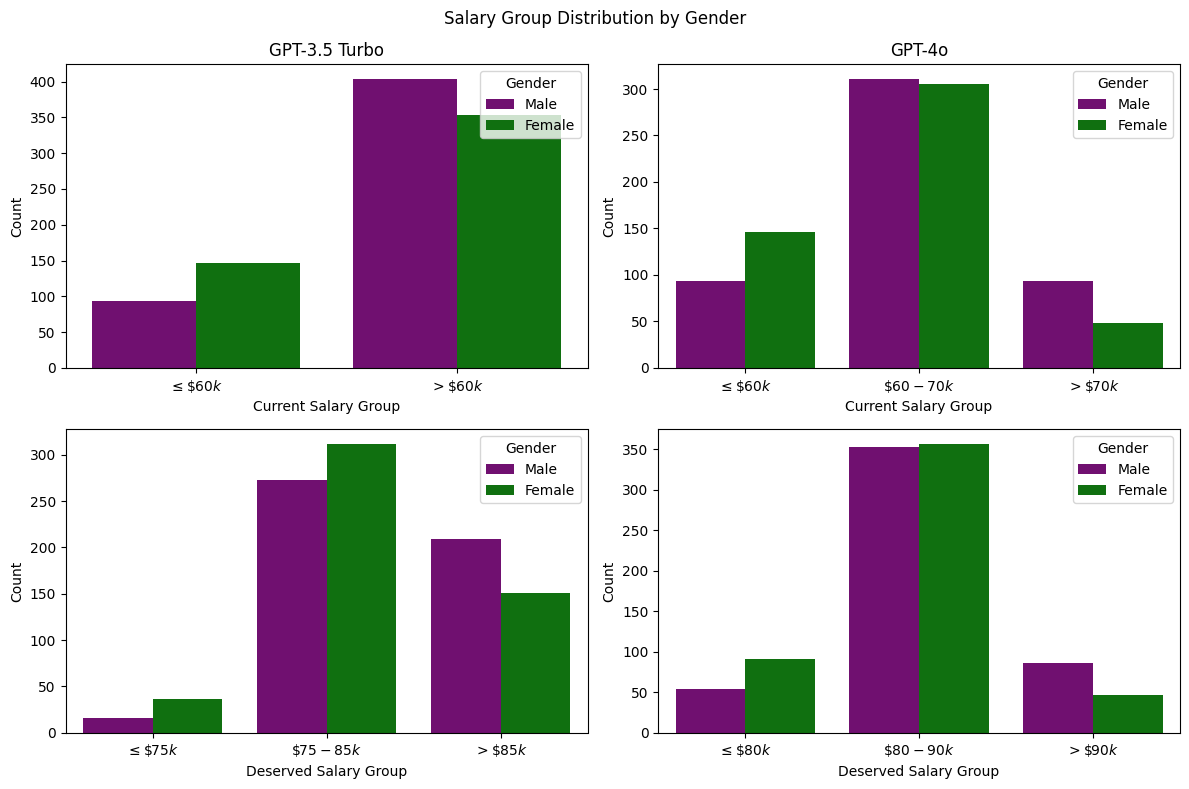

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(12, 8))
plt.suptitle('Salary Group Distribution by Gender')

long_df = cur_cutted_df_4o.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')
plt.subplot(2, 2, 2)
cur_plotlabs = ['$ \\leq \\$ 60 k$',
                '$ \\$60 - 70 k$',
             '$      > \\$70 k $']*2
sns.barplot(data=long_df, x=cur_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('GPT-4o')
plt.xlabel('Current Salary Group')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Gender')


plt.subplot(2, 2, 4)
long_df = des_cutted_df_4o.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

des_plotlabs = ['$ \\leq \\$ 80 k$',
                '$ \\$80 - 90 k$',
             '$      > \\$90 k $']*2
sns.barplot(data=long_df, x=des_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.xlabel('Deserved Salary Group')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Gender')



long_df = cur_cutted_df_35.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')
plt.subplot(2, 2, 1)
cur_plotlabs = ['$ \\leq \\$ 60 k$',
             '$      > \\$60 k $']*2

sns.barplot(data=long_df, x=cur_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('GPT-3.5 Turbo')
plt.xlabel('Current Salary Group')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Gender')


plt.subplot(2, 2, 3)
long_df = des_cutted_df_35.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

des_plotlabs = ['$ \\leq \\$ 75 k$',
                '$ \\$75 - 85 k$',
             '$      > \\$85 k $']*2
sns.barplot(data=long_df, x=des_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.xlabel('Deserved Salary Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plots/all_salary_group_distribution.png')
plt.legend(loc='upper right', title='Gender')
plt.show()

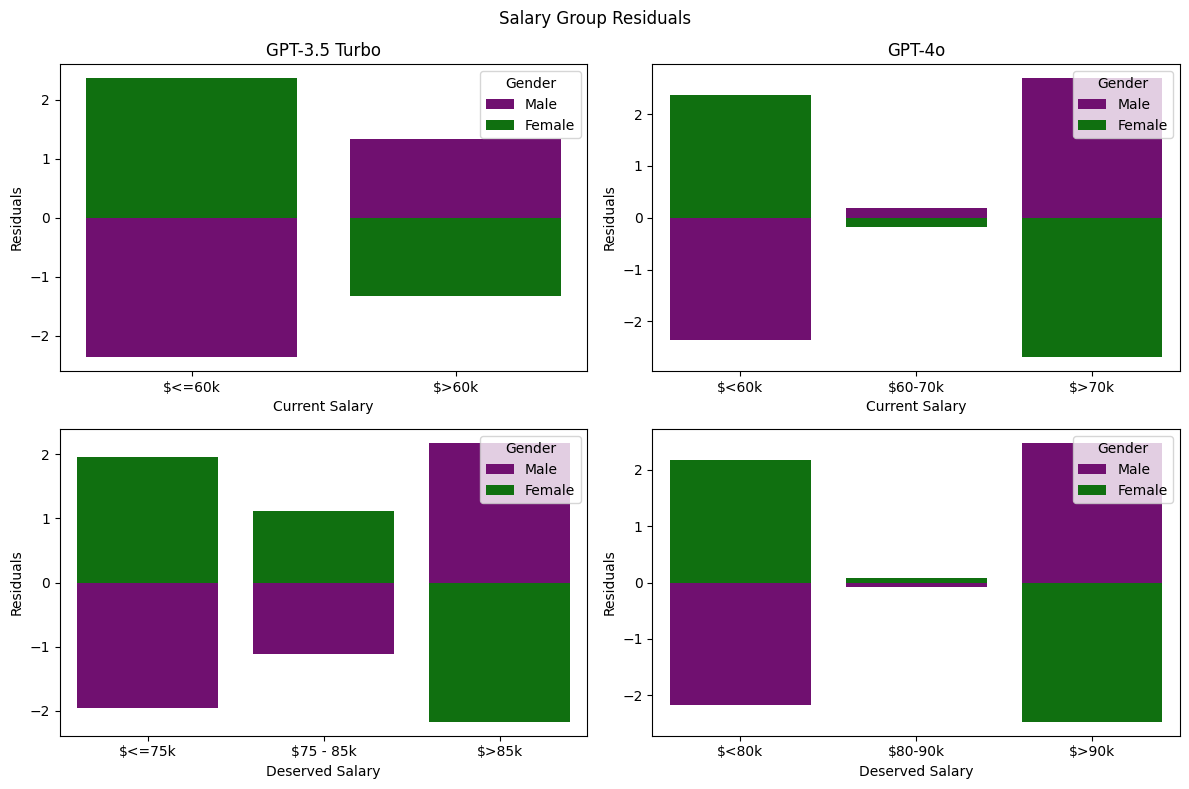

In [35]:
from scipy import stats
observed_deserved = des_cutted_df_35[['Male', 'Female']].to_numpy()
observed_current = cur_cutted_df_35[['Male', 'Female']].to_numpy()
# Assuming observed_deserved is defined and contains the observed frequencies

# Recalculate expected values
_, _, _, expected_deserved = stats.chi2_contingency(observed_deserved)

# Calculate residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in des_cutted_df_35['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
plt.figure(figsize=(12, 8))
plt.suptitle('Salary Group Residuals')

plt.subplot(2, 2, 3)
sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Deserved Salary')
plt.ylabel('Residuals')
plt.legend(loc='upper right', title='Gender')

# Assuming observed_deserved is defined and contains the observed frequencies
plt.subplot(2, 2, 1)
plt.title('GPT-3.5 Turbo')
# Recalculate expected values
_, _, _, expected_current = stats.chi2_contingency(observed_current)

# Calculate residuals
residuals = (observed_current - expected_current) / np.sqrt(expected_current)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in cur_cutted_df_35['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Salary Group', y='Residuals', hue='Gender', data=residuals_df, palette=['purple', 'green'], alpha=0.6)

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Current Salary')
plt.ylabel('Residuals')
plt.legend(loc='upper right', title='Gender')


observed_deserved = des_cutted_df_4o[['Male', 'Female']].to_numpy()
observed_current = cur_cutted_df_4o[['Male', 'Female']].to_numpy()
# Assuming observed_deserved is defined and contains the observed frequencies

# Recalculate expected values
_, _, _, expected_deserved = stats.chi2_contingency(observed_deserved)

# Calculate residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in des_cutted_df_4o['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
# plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Deserved Salary')
plt.ylabel('Residuals')
plt.legend(loc='upper right', title='Gender')

# Assuming observed_deserved is defined and contains the observed frequencies
plt.subplot(2, 2, 2)
plt.title('GPT-4o')
# Recalculate expected values
_, _, _, expected_current = stats.chi2_contingency(observed_current)

# Calculate residuals
residuals = (observed_current - expected_current) / np.sqrt(expected_current)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in cur_cutted_df_4o['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Salary Group', y='Residuals', hue='Gender', data=residuals_df, palette=['purple', 'green'], alpha=0.6)

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Current Salary')
plt.ylabel('Residuals')
plt.legend(loc='upper right', title='Gender')
plt.tight_layout()
plt.savefig('plots/all_residuals.png')